# Automatic Speech Recognition Hand-on & Advanced Kaldi Toolkit Courses
by Yuan-Fu Liao, National Taipei University of Technology
* yfliao@ntut.edu.tw
---

# Introduction to PyKaldi
* Pykaldi: A Python wrapper for Kaldi https://pykaldi.github.io

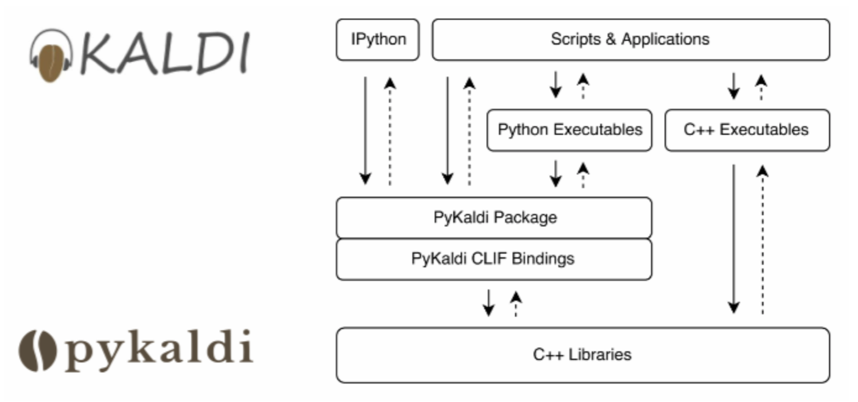

# Virtual Machine

## Hardware and Software

In [1]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.3 LTS
Release:	18.04
Codename:	bionic


In [2]:
import sys ; print(sys.version_info)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [3]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              2
On-line CPU(s) list: 0,1
Thread(s) per core:  2
Core(s) per socket:  1
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0,1
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs 

In [4]:
!cat /proc/cpuinfo | grep 'core id'

core id		: 0
core id		: 0


In [5]:
!nvidia-smi

Sat Nov 16 15:09:35 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
!df

Filesystem     1K-blocks     Used Available Use% Mounted on
overlay        375674948 31440148 325081904   9% /
tmpfs              65536        0     65536   0% /dev
tmpfs            6667592        0   6667592   0% /sys/fs/cgroup
/dev/sda1      382718764 41094076 341608304  11% /opt/bin
tmpfs            6667592       12   6667580   1% /var/colab
shm              6160384        4   6160380   1% /dev/shm
tmpfs            6667592        0   6667592   0% /proc/acpi
tmpfs            6667592        0   6667592   0% /proc/scsi
tmpfs            6667592        0   6667592   0% /sys/firmware


## Requirements
* 因為連接時間到（12小時）後會被清掉，每次重開後都要重建工作環境

In [0]:
!sudo apt update
!sudo apt-get install autoconf automake cmake curl g++ git graphviz libatlas3-base libtool make pkg-config subversion unzip wget zlib1g-dev
!sudo apt install libasound-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!sudo apt install python-pyaudio

In [0]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install numpy pyparsing
!pip install ninja  # not required but strongly recommended

In [0]:
!sudo apt install ocaml-nox
!sudo apt install z3

In [0]:
! sudo apt install sox

# Google Drive
* 連接網路硬碟以交換資料

In [0]:
from google.colab import drive
drive.mount('/content/drive/')
!ln -s "/content/drive/My Drive" "/content/mydrive"
!ln -s "/content/drive/My Drive/Colab Notebooks/" "/content/mycolab"

# PyKaldi Installation
* 編譯 PyKaldi 工具包

## Download

*請選擇要* (1)由source檔重新安裝，還是(2)下載已編譯好的程式包。選一種就可以。但請注意兩種方式都要從Tools繼續往下安裝！

**1**.   由source檔重新安裝！要編譯很久......

In [0]:
!git clone https://github.com/pykaldi/pykaldi.git

In [0]:
import os
os.chdir('/content/pykaldi')

In [0]:
!git clone -b pykaldi https://github.com/pykaldi/clif
!git clone -b pykaldi https://github.com/pykaldi/kaldi

2.   下載已編譯好之程式包: pykaldi.tar.gz。注意，被註解掉的是抓備份檔，不要執行！

In [0]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1LVFR-Ii2qWsQPVMjQWuAr1HoBZlN11PV' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1LVFR-Ii2qWsQPVMjQWuAr1HoBZlN11PV" -O /content/pykaldi.tar.gz && rm -rf /tmp/cookies.txt

In [0]:
!tar vxf /content/pykaldi.tar.gz

In [0]:
#!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wXfSEPVcdhCBja0CQpkCoeh1ECiw_1TW' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wXfSEPVcdhCBja0CQpkCoeh1ECiw_1TW" -O /content/mypykaldi.tar.gz && rm -rf /tmp/cookies.txt

In [0]:
#!tar vxf /content/mypykaldi.tar.gz

##  Tools
* Pykaldi 用到的工具程式。因為連接時間到（12小時）後會被清掉，每次重開後都要重建工作環境

In [0]:
import os
os.chdir('/content/pykaldi/tools')
!pwd

In [0]:
!./check_dependencies.sh  # checks if system dependencies are installed

In [0]:
!./install_protobuf.sh    # installs both the C++ library and the Python package

In [0]:
!./install_clif.sh /usr/bin/python3 /usr/lib/x86_64-linux-gnu/libpython3.6m.so.1       # installs both the C++ library and the Python package

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先編譯好，可以跳過。注意，若重新編譯需要數小時時間！
!./install_kaldi.sh       # installs the Kaldi toolkit

## Installation
* 建立 python package。這邊也是每次重開後都要重裝pykaldi套件到python工作環境中

In [0]:
# 避免setup.py自動選擇python2。強迫使用python3，因為colab環境是使用python3
!sudo mv /usr/local/bin/python /usr/local/bin/python.xx
!sudo mv /usr/bin/python /usr/bin/python.xx

In [0]:
# 清掉之前的設置（重新編譯要很久）
#!rm -rf /content/pykaldi/build/

In [0]:
import os
os.chdir('/content/pykaldi')
!/usr/bin/python3.6 setup.py install

In [0]:
# 復原python環境。因為之前為避免setup.py自動選擇python2，強迫其使用python3。
!sudo cp /usr/local/bin/python.xx /usr/local/bin/python
!sudo cp /usr/bin/python.xx /usr/bin/python

In [0]:
# 測試apykaldi是否正確安裝。測試都有PASSED，就沒問題，可以開始使用！
!python setup.py test

In [0]:
!pip list | grep pykaldi

# Experimental Working Environment

## Microphone

In [0]:
AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);

function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

## Python Packages

In [0]:
!pip install pyaudio
!pip install ffmpeg-python
!pip install librosa
!pip install pydub
!pip install praat-parselmouth
!pip install sklearn

In [0]:
import os # to save/open files 
import sys
import io
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import ffmpeg
import wave
import pydub
from pydub import AudioSegment
from scipy.io.wavfile import read as wav_read
import matplotlib.pyplot as plt
import librosa
import librosa.display
from six.moves.urllib.parse import quote
import parselmouth
from sklearn import preprocessing

## Function Calls

In [0]:
def write_wav(f, sr, x, normalized=False):
    # 開檔
    f = wave.open(f, "wb")

    # 配置聲道数、量化位数和取樣频率
    f.setnchannels(1)
    f.setsampwidth(2)
    f.setframerate(sr)

    # 轉換為二進制，再寫入檔案
    wave_data = x.astype(np.short)
    f.writeframes(wave_data.tostring())
    f.close()

In [0]:
def get_audio(human_sound_file):
		global hnum

		# call microphone
		display(HTML(AUDIO_HTML))
		data = eval_js("data")
		binary = b64decode(data.split(',')[1])
  
		process = (ffmpeg
	  		.input('pipe:0')
	  		.output('pipe:1', format='wav')
	  		.run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
		)
		output, err = process.communicate(input=binary)
  
		riff_chunk_size = len(output) - 8
		# Break up the chunk size into four bytes, held in b.
		q = riff_chunk_size
		b = []
		for i in range(4):
				q, r = divmod(q, 256)
				b.append(r)

		# Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
		riff = output[:4] + bytes(b) + output[8:]
		sr, audio = wav_read(io.BytesIO(riff))

		# save
		print(human_sound_file)
		write_wav(human_sound_file, sr, audio)

		return human_sound_file

In [0]:
def write_wav(f, sr, x, normalized=False):
    # 開檔
    f = wave.open(f, "wb")

    # 配置聲道数、量化位数和取樣频率
    f.setnchannels(1)
    f.setsampwidth(2)
    f.setframerate(sr)

    # 轉換為二進制，再寫入檔案
    wave_data = x.astype(np.short)
    f.writeframes(wave_data.tostring())
    f.close()

In [0]:
def get_audio(human_sound_file):
		global hnum

		# call microphone
		display(HTML(AUDIO_HTML))
		data = eval_js("data")
		binary = b64decode(data.split(',')[1])
  
		process = (ffmpeg
	  		.input('pipe:0')
	  		.output('pipe:1', format='wav')
	  		.run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
		)
		output, err = process.communicate(input=binary)
  
		riff_chunk_size = len(output) - 8
		# Break up the chunk size into four bytes, held in b.
		q = riff_chunk_size
		b = []
		for i in range(4):
				q, r = divmod(q, 256)
				b.append(r)

		# Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
		riff = output[:4] + bytes(b) + output[8:]
		sr, audio = wav_read(io.BytesIO(riff))


		# save
		print(human_sound_file)
		write_wav(human_sound_file, sr, audio)

		return human_sound_file

# Feature Extraction

In [0]:
import os
os.chdir('/content/')

## Loading Speech file
* 以下的音檔，請選一個

In [0]:
!cp /content/pykaldi/examples/setups/aspire/data/LibriSpeech-dev-clean-2/1272-135031-0000.flac.wav /content/utt0.wav
!sox utt0.wav -r 16000 -c 1 -b 16 -e signed-integer utt1.wav
Audio('utt1.wav', autoplay=False)

In [0]:
!cp /content/pykaldi/examples/setups/NER-Trs-Vol1/data/test/BW_20171229_006.wav /content/utt0.wav
!sox utt0.wav -r 16000 -c 1 -b 16 -e signed-integer utt1.wav
Audio('utt1.wav', autoplay=False)

In [0]:
# Human Speak
human_sound_file = 'utt0.wav'
get_audio(human_sound_file)
!sox utt0.wav -r 16000 -c 1 -b 16 -e signed-integer utt1.wav
human_sound_file = 'utt1.wav'

## FBanks, MFCCs and Pitch

In [0]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

from kaldi.feat.window import FeatureWindowFunction, FrameExtractionOptions
from kaldi.feat.spectrogram import Spectrogram, SpectrogramOptions
from kaldi.feat.mfcc import Mfcc, MfccOptions
from kaldi.feat.fbank import Fbank, FbankOptions
from kaldi.feat.mel import MelBanks, MelBanksOptions
from kaldi.feat.pitch import PitchExtractionOptions, ProcessPitchOptions
from kaldi.feat.pitch import *

from kaldi.matrix import SubVector, SubMatrix
from kaldi.util.options import ParseOptions
from kaldi.util.table import SequentialWaveReader
from kaldi.util.table import MatrixWriter
from numpy import mean
from sklearn.preprocessing import scale

with open("testfile.scp", "w") as outpt:
    outpt.write("TEST utt1.wav")

spec_opts = SpectrogramOptions()
mfcc_opts = MfccOptions()
mfcc_opts.frame_opts.samp_freq = 16000
fbank_opts = FbankOptions()
pitch_opts = PitchExtractionOptions()
pitch_opts.samp_freq=16000.0
pitch_process_opts=ProcessPitchOptions()
pitch_process_opts.add_raw_log_pitch=True

rspec, fbank_wspec, mfcc_wspec, pitch_wspec, spec_wspec = \
        "scp:testfile.scp", "ark,t:test_fbank.ark", \
        "ark,t:test_mfcc.ark", "ark,t:test_pitch.ark", \
        "ark,t:test_spec.ark"

# class, no pitch class, only pitch function calls
spec = Spectrogram(spec_opts)
mfcc = Mfcc(mfcc_opts)
fbank = Fbank(fbank_opts)
sf = mfcc_opts.frame_opts.samp_freq

with SequentialWaveReader(rspec) as reader, \
        MatrixWriter(fbank_wspec) as fbank_writer, \
        MatrixWriter(mfcc_wspec) as mfcc_writer, \
        MatrixWriter(pitch_wspec) as pitch_writer, \
        MatrixWriter(spec_wspec) as spec_writer:
            
    for key, wav in reader:
                    
        assert(wav.samp_freq >= sf)
        assert(wav.samp_freq % sf == 0)

        print(">>> print(wav.sample_freq)")
        print(wav.samp_freq)
        print()
        
        s = wav.data()
        print(">>> print(s)")
        print(s)
        print()

        # mix-down stereo to mono
        m = SubVector(mean(s, axis=0))

        # compute pitch features
        pitch_f = compute_kaldi_pitch(pitch_opts,m)
        pitch_f = process_pitch(pitch_process_opts,pitch_f)
        # standardize features
        pitch_f = SubMatrix(scale(pitch_f))
        print(">>> print(pitch_f)")
        print(pitch_f)
        print()
        # write features to archive
        pitch_writer[key] = pitch_f

        # compute Spectrogram features
        spec_f = spec.compute_features(m, sample_freq=sf, vtln_warp=1.0)
        # standardize features
        spec_f = SubMatrix(scale(spec_f))
        print(">>> print(spec_f)")
        print(spec_f)
        print()
        # write features to archive
        spec_writer[key] = spec_f

        # compute FBANK features
        fbank_f = fbank.compute_features(m, sample_freq=sf, vtln_warp=1.0)
        # standardize features
        fbank_f = SubMatrix(scale(fbank_f))
        print(">>> print(fbank_f)")
        print(fbank_f)
        print()
        # write features to archive
        fbank_writer[key] = fbank_f

        # compute MFCC features
        mfcc_f = mfcc.compute_features(m, sample_freq=sf, vtln_warp=1.0)
        # standardize features
        mfcc_f = SubMatrix(scale(mfcc_f))
        print(">>> print(mfcc_f)")
        print(mfcc_f)
        print()
        # write features to archive
        mfcc_writer[key] = mfcc_f

audio = s.numpy().transpose()
pitch_feature = pitch_f.numpy()
fbank_feature = fbank_f.numpy().transpose()
mfcc_feature = mfcc_f.numpy().transpose()
spec_feature = spec_f.numpy().transpose()

# plot
plt.figure(figsize=(32, 24))

# waveform
plt.subplot(4,1,1)
x = np.linspace(0,len(audio)/sf,len(audio))
print(x.shape, audio.shape)
plt.plot(x,audio)
plt.xlabel('Time')
plt.ylabel('Magitude')
plt.xlim(x.min(), x.max())

plt.subplot(4,1,2)
librosa.display.specshow(spec_feature, sr=16000,  hop_length=160, x_axis='time', y_axis= 'linear', cmap='jet')

plt.subplot(4,1,3)
librosa.display.specshow(fbank_feature, sr=16000, hop_length=160, x_axis='time', y_axis='mel', cmap='jet')

plt.subplot(4,1,4)
librosa.display.specshow(mfcc_feature, sr=16000, hop_length=160, x_axis='time', y_axis='off', cmap='jet')

plt.tight_layout

# pitch features
plt.figure(figsize=(32, 12))
x = np.linspace(0,len(pitch_feature)/100,len(pitch_feature))

plt.subplot(4,1,1)
plt.xlabel('Time')
plt.ylabel('POV')
plt.plot(x, pitch_feature[:,0])
plt.xlim(x.min(), x.max())

plt.subplot(4,1,2)
plt.plot(x, pitch_feature[:,1])
plt.xlabel('Time')
plt.ylabel('log-Pitch')
plt.xlim(x.min(), x.max())

plt.subplot(4,1,3)
plt.plot(x, pitch_feature[:,2])
plt.xlabel('Time')
plt.ylabel('Delta-log-Pitch')
plt.xlim(x.min(), x.max())

plt.subplot(4,1,4)
plt.plot(x, pitch_feature[:,3])
plt.xlabel('Time')
plt.ylabel('Raw-log-Pitch')
plt.xlim(x.min(), x.max())

plt.tight_layout

## Praat vs. Kaldi
* 比較 Kali 跟 Praat 求出來的 pitch contour，kaldi比較平滑

In [0]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='gray')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=8, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=4)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

In [0]:
snd = parselmouth.Sound('utt1.wav')
snd.resample(new_frequency=16000)
pitch = snd.to_pitch()

# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)

plt.figure(figsize=(32, 10))
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])

yp0 = pitch.selected_array['frequency']
yp0[yp0==0] = np.nan
yp0m = np.nanmean(yp0)
yp0d = np.nanstd(yp0)

yp = yp0m + yp0d*pitch_feature[:,3]
xs = np.linspace(snd.xmin, snd.xmax, len(yp))
plt.plot(xs, yp, linewidth=3)
plt.twinx()
plt.tight_layout

# English Speech Recognizer

## Introduction

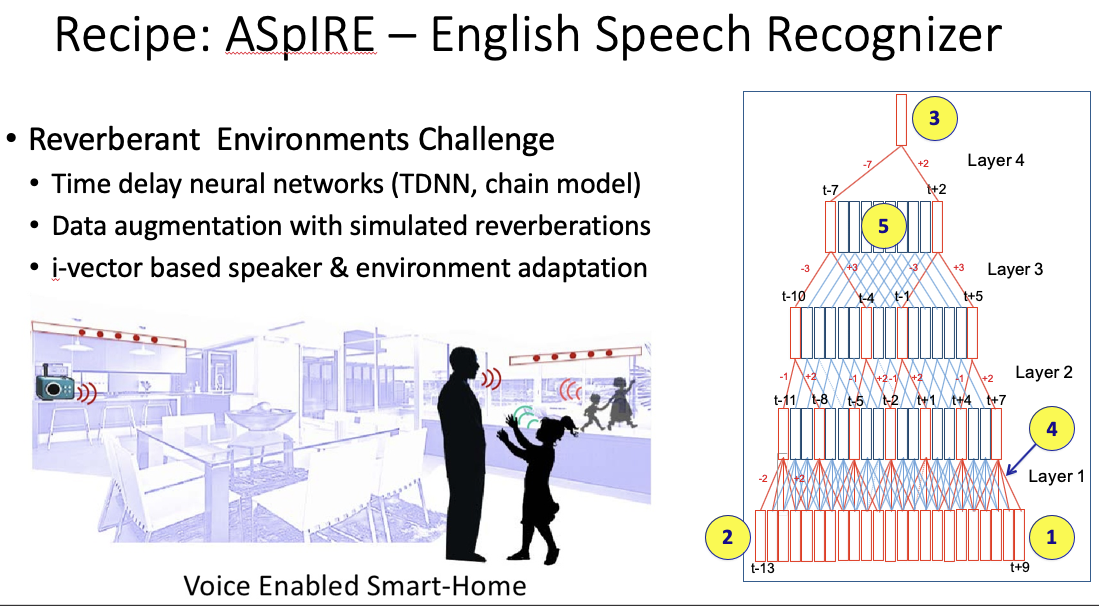

## Download Corpus
* LibriSpeech

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先打包進來了，可以跳過
import os
os.chdir('/content/pykaldi/examples/setups/aspire/data')

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先打包進來了，可以跳過
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nRVwLS0jT1jMNBy-uhyZhEHJ5McmcOye' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nRVwLS0jT1jMNBy-uhyZhEHJ5McmcOye" -O /content/LibriSpeech-dev-clean-2.zip && rm -rf /tmp/cookies.txt

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先打包進來了，可以跳過
!unzip -o /content/LibriSpeech-dev-clean-2.zip

## Download Model
* Aspire

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先打包進來了，可以跳過
import os
os.chdir('/content/pykaldi/examples/setups/aspire/')
!ls

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先打包進來了，可以跳過
!./models.sh

## Decoding

In [0]:
# 列印測試音檔
!cat data/test/wav.scp

In [0]:
# 開始辨認
!source path.sh && /usr/bin/python3 decode.py

## Recognition Results

In [0]:
# 列印辨認結果
!cat out/test/decode.out

In [0]:
Audio('data/LibriSpeech-dev-clean-2/1272-135031-0000.flac.wav', autoplay=True)

In [0]:
Audio('data/LibriSpeech-dev-clean-2/1272-135031-0001.flac.wav', autoplay=True)

# Mandarin Speech Recognizer

## Introduction

* National Education Radio Corpus


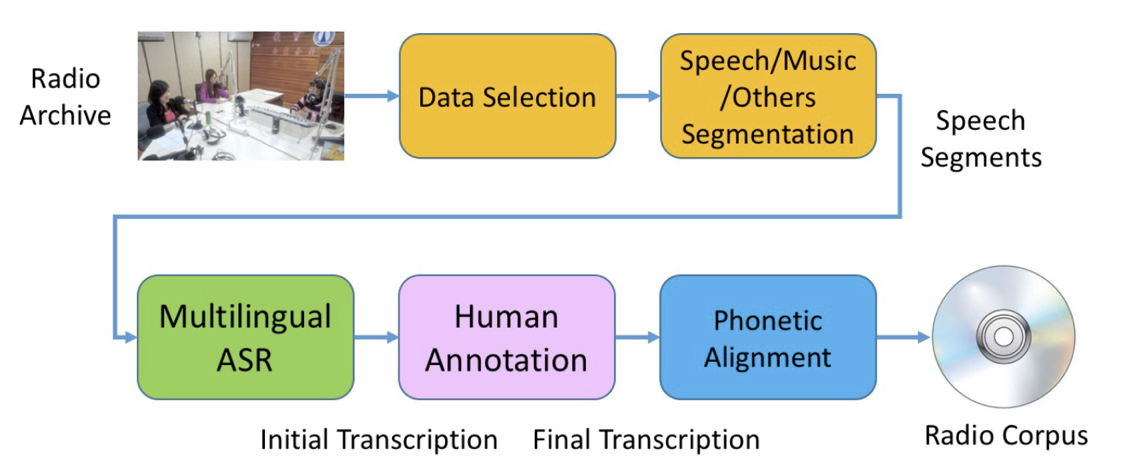

* Kaldi Nnet3/Chain Time-Delay Neural Network

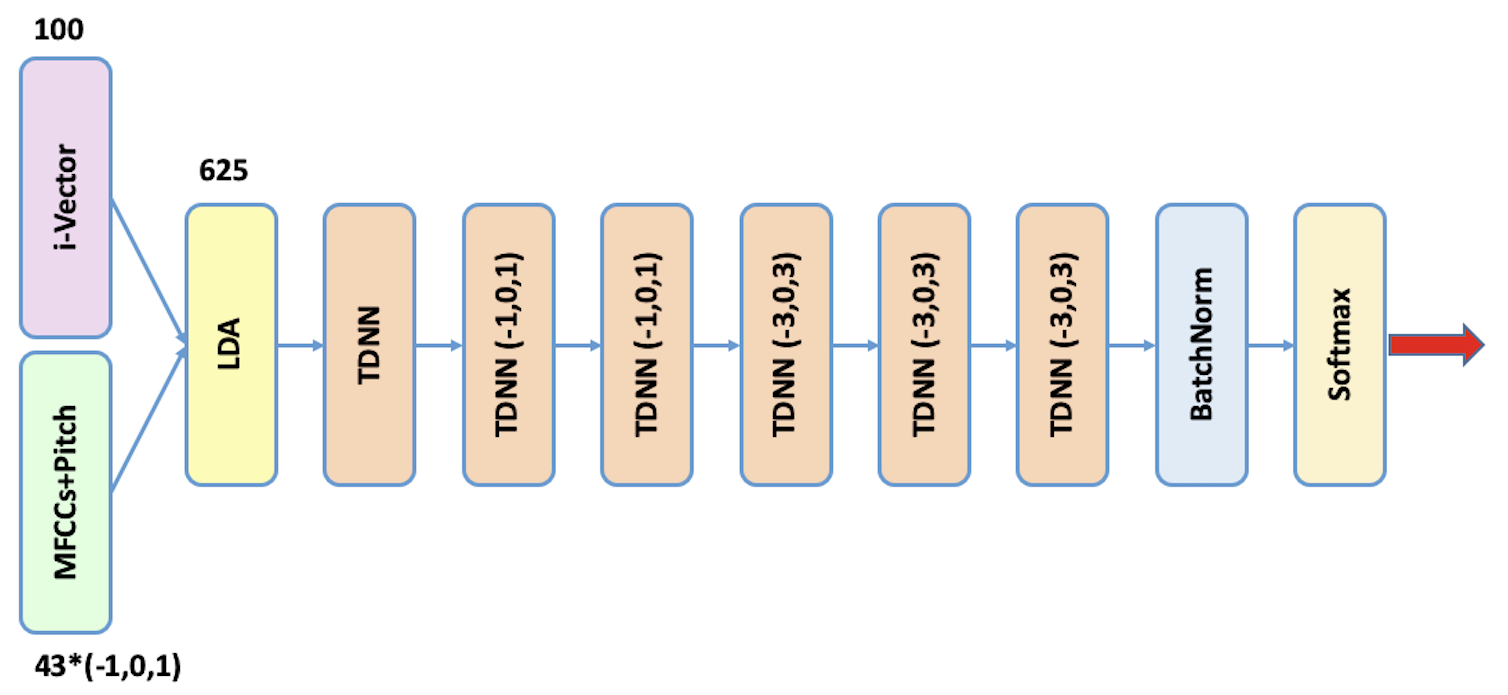

## Download Model

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先打包進來了，可以跳過
import os
os.chdir('/content/pykaldi/examples/setups/')

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先打包進來了，可以跳過
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1tx79zbDMS9o1ZEhPA2VylKuFxdEj37a9' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1tx79zbDMS9o1ZEhPA2VylKuFxdEj37a9" -O /content/NER-Trs-Vol1.zip && rm -rf /tmp/cookies.txt

In [0]:
# 若你是選『（2）下載已編譯好的程式包』，這部分已經事先打包進來了，可以跳過
!unzip -o /content/NER-Trs-Vol1.zip

## Recognition

In [0]:
import os
os.chdir('/content/pykaldi/examples/setups/NER-Trs-Vol1/')

In [0]:
# 列印測試音檔
!cat data/test/wav.scp

### Decoding: Batch Mode

In [0]:
!source path.sh && /usr/bin/python3 decode.py

In [0]:
!cat out/test/decode.out

In [0]:
Audio('data/test/BW_20171229_006.wav', autoplay=True)

In [0]:
Audio('data/test/BW_20171229_034.wav', autoplay=True)

### Standalone Mode

In [0]:
!./standalone.sh

In [0]:
#!cat out/test/standalone-decode.txt

### Online Mode

In [0]:
# Human Speak
human_sound_file = 'data/test/utt0.wav'
get_audio(human_sound_file)
!sox data/test/utt0.wav -r 16000 -c 1 -b 16 -e signed-integer data/test/utt1.wav
human_sound_file = 'data/test/utt1.wav'

In [0]:
!source path.sh && /usr/bin/python3 decode-1.py

In [0]:
!cat out/test/decode-1.out

In [0]:
# utt1.wav
human_sound_file = 'data/test/utt1.wav'
Audio(human_sound_file, autoplay=True)

# Backup
* 你有更改，又有想要保存，才需要做！

In [0]:
import os
os.chdir('/content/')
!tar vcf mypykaldi.tar.gz pykaldi

In [0]:
!cp /content/mypykaldi.tar.gz /content/mycolab/

In [0]:
!cp /content/mypykaldi.tar.gz /content/mydrive/OpenAIFunCup/03\ CoLab/